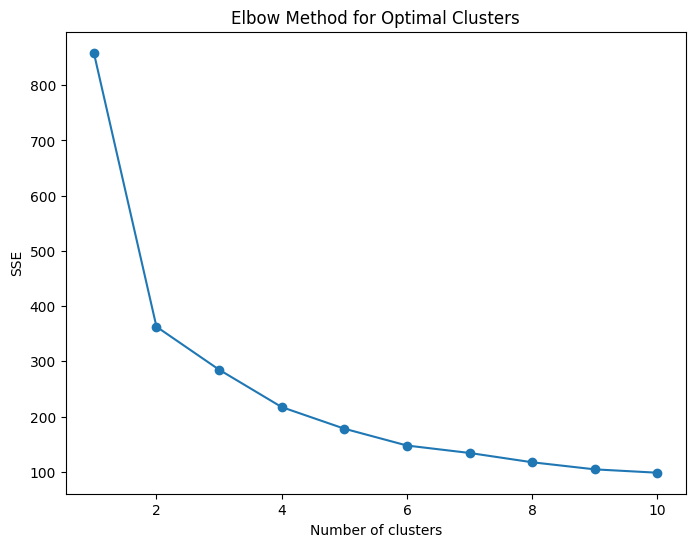

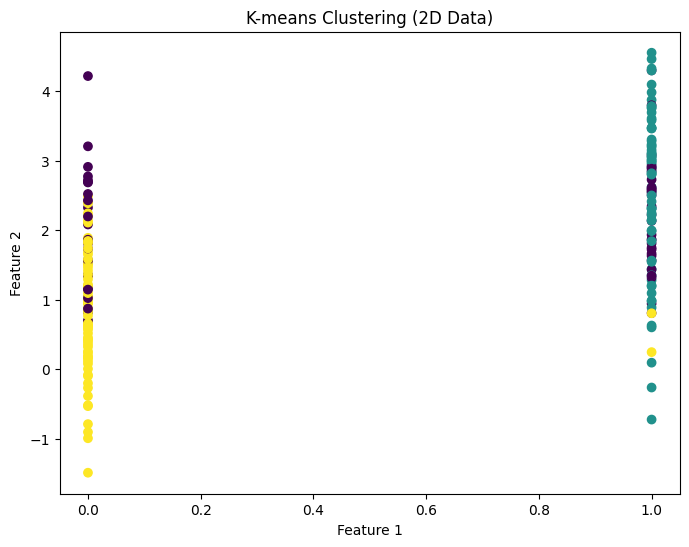

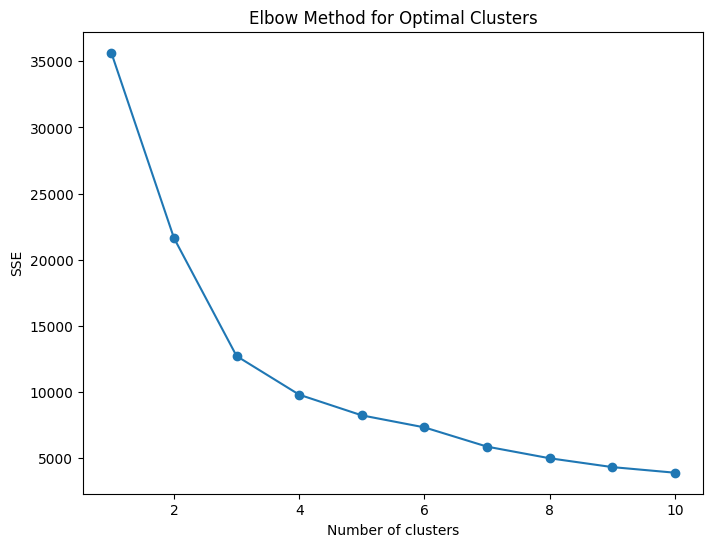

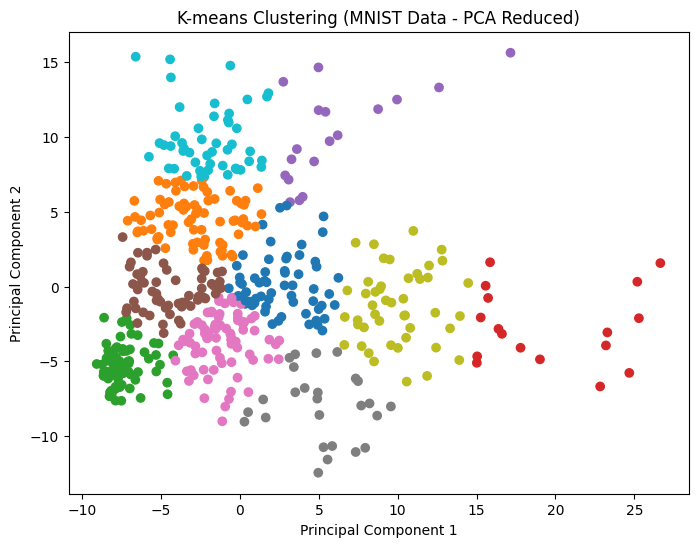

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the datasets
data_2d = pd.read_csv('C:\\Project\\PhythonDataScience\\dtsc_modul_6_homework\\data_2d.csv')
mnist = pd.read_csv('C:\\Project\\PhythonDataScience\\dtsc_modul_6_homework\\mnist.csv')

# Function to determine the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method for Optimal Clusters')
    plt.show()

# Apply K-means to the 2D dataset
find_optimal_clusters(data_2d, 10)

# Fit K-means with the optimal number of clusters (change based on the elbow plot)
optimal_clusters_2d = 3 
kmeans_2d = KMeans(n_clusters=optimal_clusters_2d, random_state=42)
clusters_2d = kmeans_2d.fit_predict(data_2d)

# Add the cluster labels to the dataframe
data_2d['Cluster'] = clusters_2d

# Visualize the clustering result for the 2D dataset
plt.figure(figsize=(8, 6))
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=clusters_2d, cmap='viridis', marker='o')
plt.title('K-means Clustering (2D Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Standardize the MNIST data
scaler = StandardScaler()
mnist_scaled = scaler.fit_transform(mnist)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_scaled)

# Determine the optimal number of clusters for the MNIST dataset
find_optimal_clusters(mnist_pca, 10)

# Fit K-means with the optimal number of clusters (change based on the elbow plot)
optimal_clusters_mnist = 10 
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, random_state=42)
clusters_mnist = kmeans_mnist.fit_predict(mnist_pca)

# Add the cluster labels to the PCA-transformed dataframe
mnist_pca_df = pd.DataFrame(mnist_pca, columns=['PC1', 'PC2'])
mnist_pca_df['Cluster'] = clusters_mnist

# Visualize the clustering result for the MNIST dataset in 2D
plt.figure(figsize=(8, 6))
plt.scatter(mnist_pca_df['PC1'], mnist_pca_df['PC2'], c=clusters_mnist, cmap='tab10', marker='o')
plt.title('K-means Clustering (MNIST Data - PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
